# Fundamentos de Linguagem Python Para Análise de Dados e Data Science
Análise de Séries Temporais em Python
Problema de Negócio: Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [2]:
# Versão da linguagem python
from platform import python_version
print(" A versão da linguagem python utilizada neste projeto e:  ", python_version())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

 A versão da linguagem python utilizada neste projeto e:   3.11.5


In [3]:
# Carregando arquivo de dados
df_dsa = pd.read_csv('dataset.csv')

In [4]:
# Visualizar numero de linhas e colunas do dataset
print('Numwero de linhas , Colunas do dataset: ',df_dsa.shape)   # Exibe o número de linhas e colunas
print('Nome das colunas do dataset: ', df_dsa.columns) # Exibe os nomes das colunas

Numwero de linhas , Colunas do dataset:  (365, 2)
Nome das colunas do dataset:  Index(['Data', 'Total_Vendas'], dtype='object')


In [17]:
# Exibir primeiros registros do dataset
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [18]:
# Exibir ultimos registros do dataset
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


### Pré-Processamento dos Dados

In [13]:
# exibir valor menor da coluna data
print("A menor data no DataFrame é:", df_dsa['Data'].min())

A menor data no DataFrame é: 2023-01-01 00:00:00


In [14]:
# exibir valor maior da coluna data
print("A maior data no DataFrame é:", df_dsa['Data'].max())

A maior data no DataFrame é: 2023-12-31 00:00:00


In [15]:
# visualizar as informações do DataFrame
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [10]:
# Converte a coluna de data no tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [16]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [20]:
type(serie_temporal)

pandas.core.series.Series

In [21]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [22]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [23]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Analise Exploratoria 

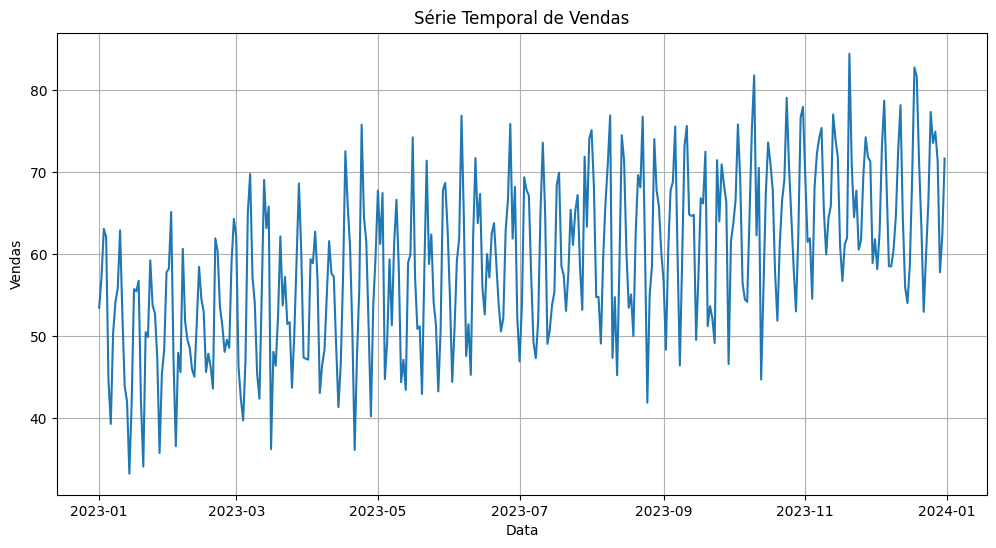

In [24]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

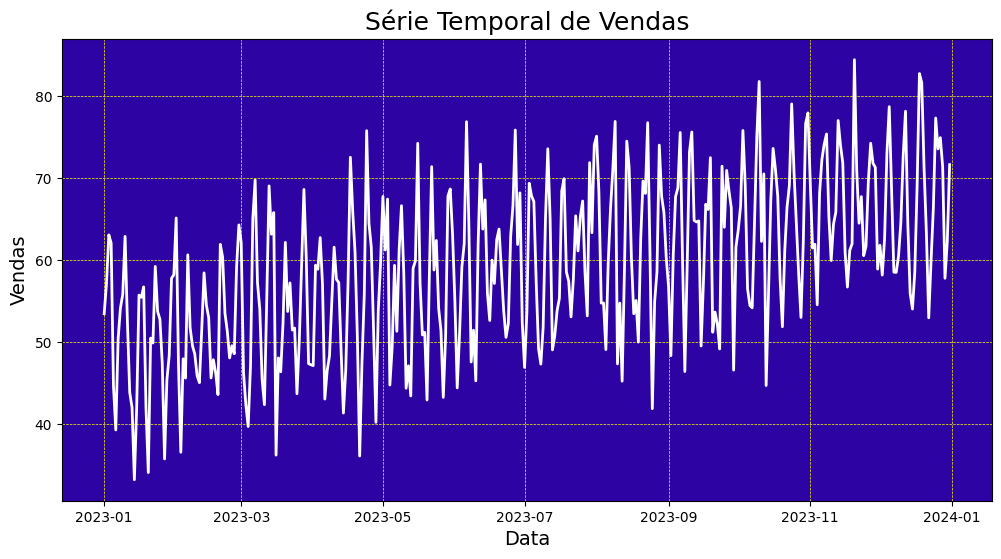

In [25]:
# Cria o gráfico da série temporal (com formatação)

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'white', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

# Suavização Exponencial
#### A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.Suposições da Suavização Exponencial
https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html
#### No Statsmodels, a classe SimpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.O modelo SimpleExpSmoothing do Statsmodels, também conhecido como suavização exponencial simples ou média móvel exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. As principais suposições do modelo SimpleExpSmoothing são as seguintes:A série temporal é composta por um componente de nível (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazonalidade na série.O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos.O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.O modelo SimpleExpSmoothing é uma técnica de suavização bastante simples que tem suas limitações. Ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades claras e para fazer previsões de curto prazo. Para séries temporais com componentes de tendência e/ou sazonalidade, modelos mais avançados como o ExponentialSmoothing de Holt-Winters ou modelos SARIMA podem ser mais apropriados.

In [26]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

Esta linha acima cria uma instância da classe SimpleExpSmoothing, #utilizando a coluna 'Vendas' da série serie_temporal como entrada.

In [27]:
# Treinamento (ajuste) do modelo
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Criando o modelo de suavização exponencial
modelo = SimpleExpSmoothing(serie_temporal)

# Ajustando o modelo com um nível de suavização de 0.2
modelo_ajustado = modelo.fit(smoothing_level=0.2, optimized=False)

Esta linha acima faz uma chamada ao método fit() para ajustar o modelo de suavização exponencial aos dados. O argumento smoothing_level=0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [28]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

Esta linha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão.

O resultado final é uma nova série temporal chamada suavizacao_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo.

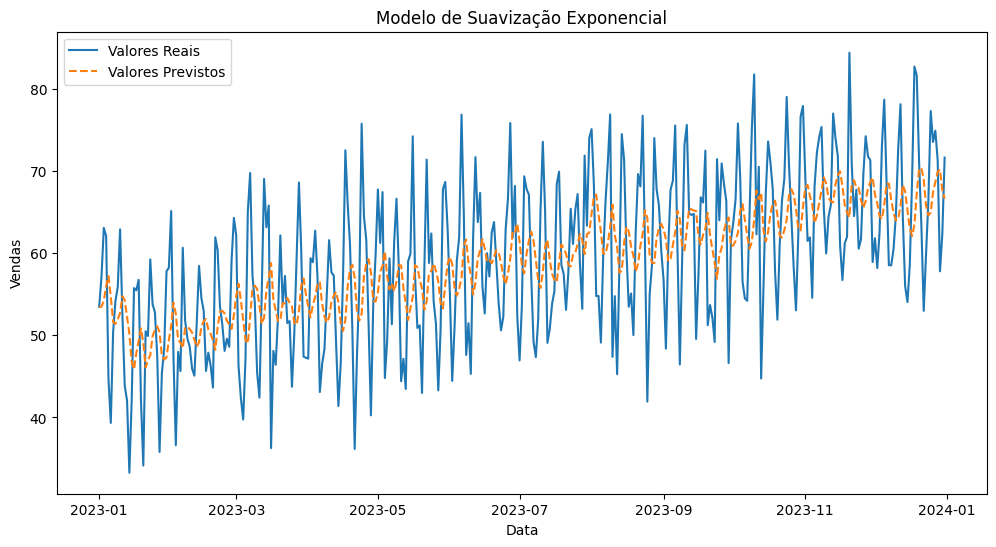

In [29]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## Deploy e Previsão com o Modelo Treinado

In [30]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)
print('Previsão do Total de Vendas Para Janeiro/2024:', round(previsoes[0], 4))

Previsão do Total de Vendas Para Janeiro/2024: 67.6499


# Minha solução completa

<class 'pandas.core.series.Series'>
                      Data  Total_Vendas
count                  365    365.000000
mean   2023-07-02 00:00:00     59.152472
min    2023-01-01 00:00:00     33.265284
25%    2023-04-02 00:00:00     51.496725
50%    2023-07-02 00:00:00     59.165362
75%    2023-10-01 00:00:00     66.610772
max    2023-12-31 00:00:00     84.430251
std                    NaN     10.056436


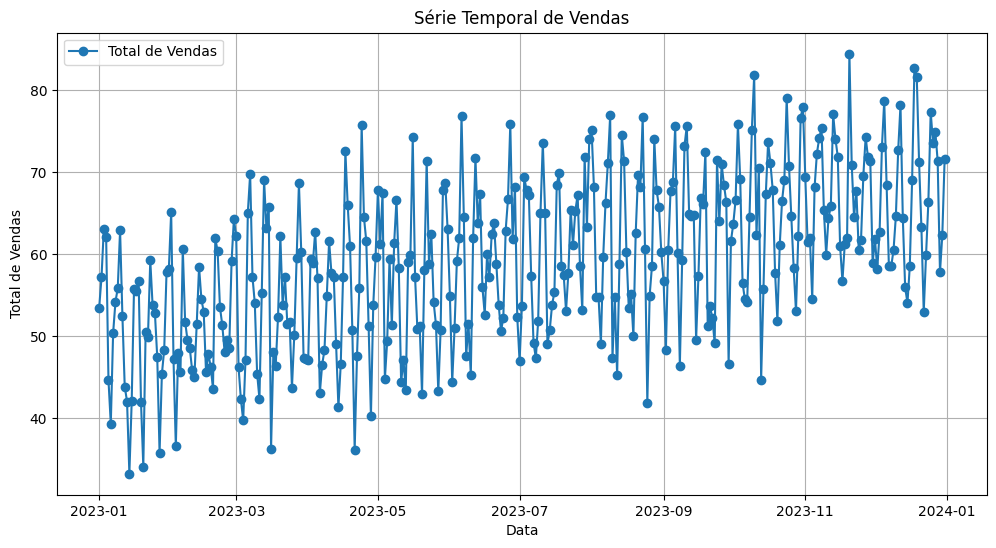

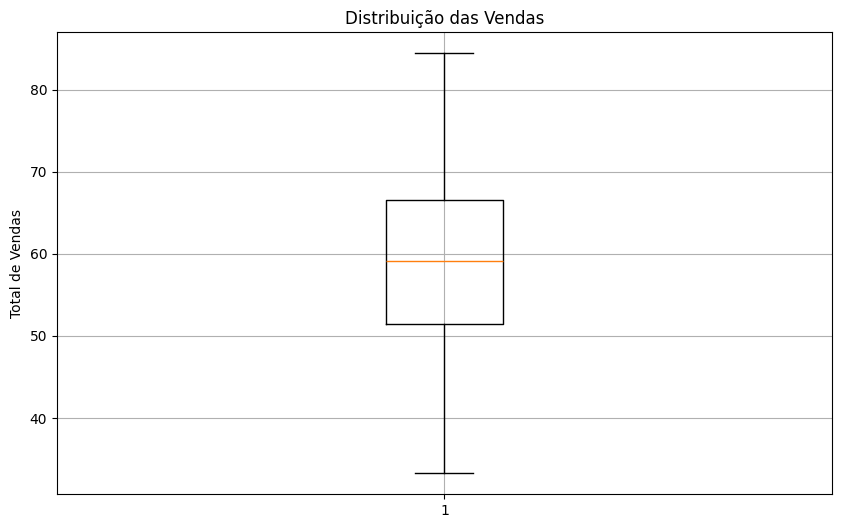

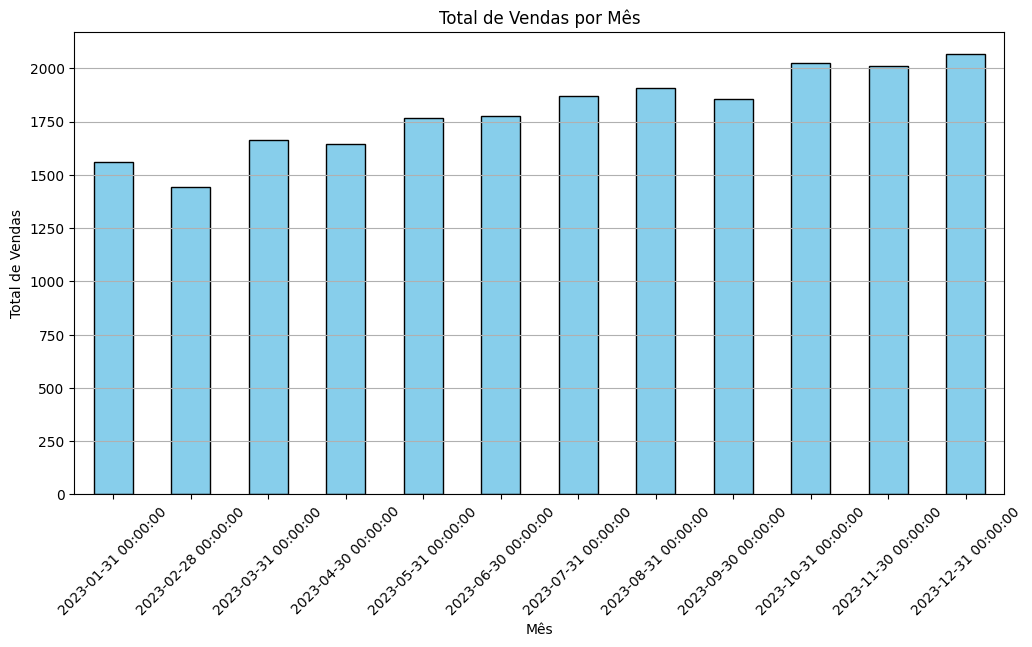

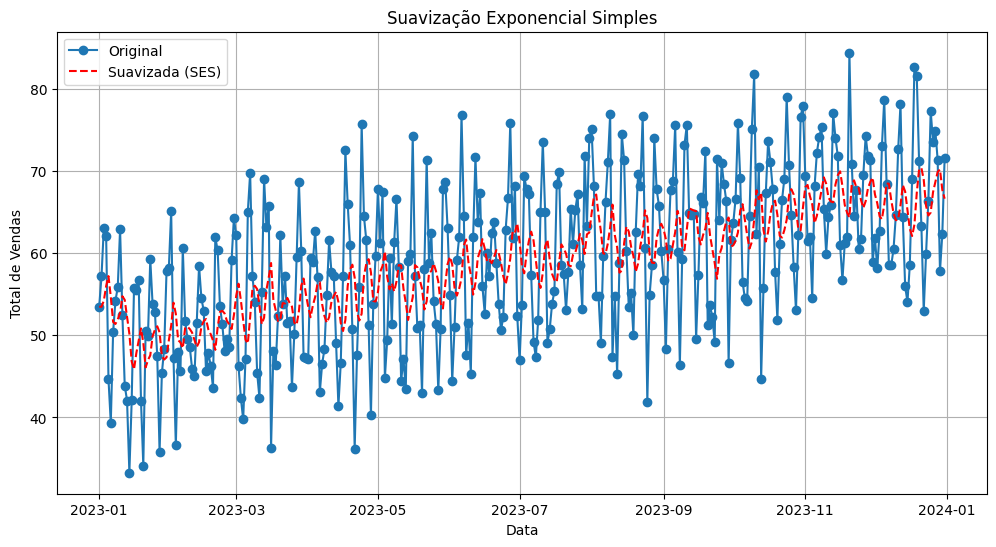

Previsões para os próximos 7 dias:
2024-01-01    67.649892
2024-01-02    67.649892
2024-01-03    67.649892
2024-01-04    67.649892
2024-01-05    67.649892
2024-01-06    67.649892
2024-01-07    67.649892
Freq: D, dtype: float64


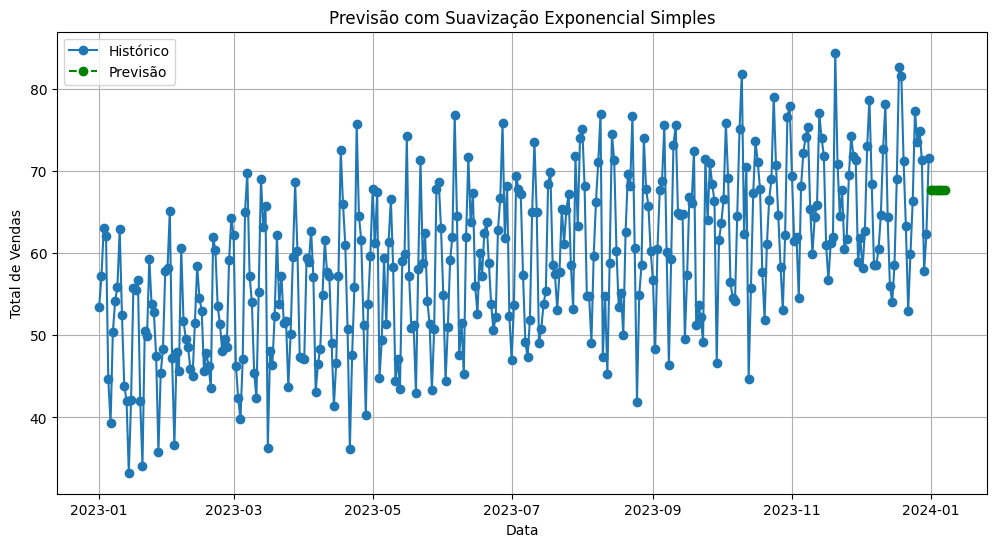

In [31]:
# Minha Adaptação 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Converte a coluna 'Data' para o tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

# Definir a frequência como diária (D)
serie_temporal = serie_temporal.asfreq('D')

# Verificar o tipo da variável 'serie_temporal'
print(type(serie_temporal))

# Análise Exploratória: Estatísticas descritivas
print(df_dsa.describe())

# Gráfico de linha (Série temporal)
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, marker='o', linestyle='-', label='Total de Vendas')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Série Temporal de Vendas")
plt.legend()
plt.grid()
plt.show()

# Gráfico Boxplot para verificar a distribuição dos dados
plt.figure(figsize=(10, 6))
plt.boxplot(serie_temporal)
plt.title("Distribuição das Vendas")
plt.ylabel("Total de Vendas")
plt.grid(True)
plt.show()

# Gráfico de barras - Vendas por mês (resumo mensal)
serie_temporal_mensal = serie_temporal.resample('M').sum()  # Soma das vendas por mês

plt.figure(figsize=(12, 6))
serie_temporal_mensal.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total de Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Suavização Exponencial Simples (SES)
modelo = SimpleExpSmoothing(serie_temporal)

# Treinamento do modelo com um fator de suavização
modelo_ajustado = modelo.fit(smoothing_level=0.2, optimized=False)

# Gerar previsões para o histórico
serie_suavizada = modelo_ajustado.fittedvalues

# Plotando a série original e a suavizada
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Original", linestyle='-', marker='o')
plt.plot(serie_suavizada, label="Suavizada (SES)", linestyle='--', color='red')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Suavização Exponencial Simples")
plt.legend()
plt.grid()
plt.show()

# Definir o horizonte de previsão (exemplo: 7 dias à frente)
previsao = modelo_ajustado.forecast(steps=7)

# Exibir previsões
print("Previsões para os próximos 7 dias:")
print(previsao)

# Plotando a previsão
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", linestyle='-', marker='o')
plt.plot(previsao, label="Previsão", linestyle='--', color='green', marker='o')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Previsão com Suavização Exponencial Simples")
plt.legend()
plt.grid()
plt.show()

<class 'pandas.core.series.Series'>


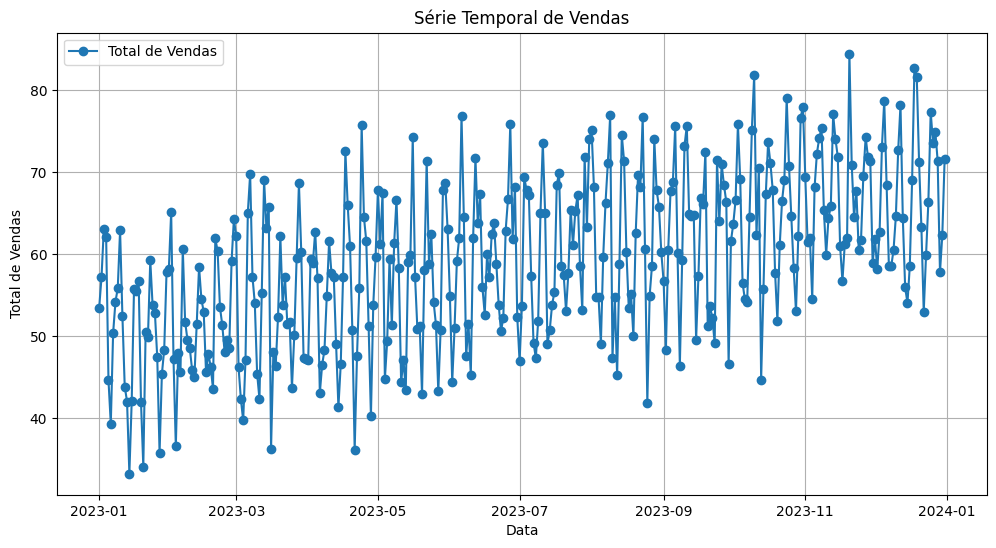

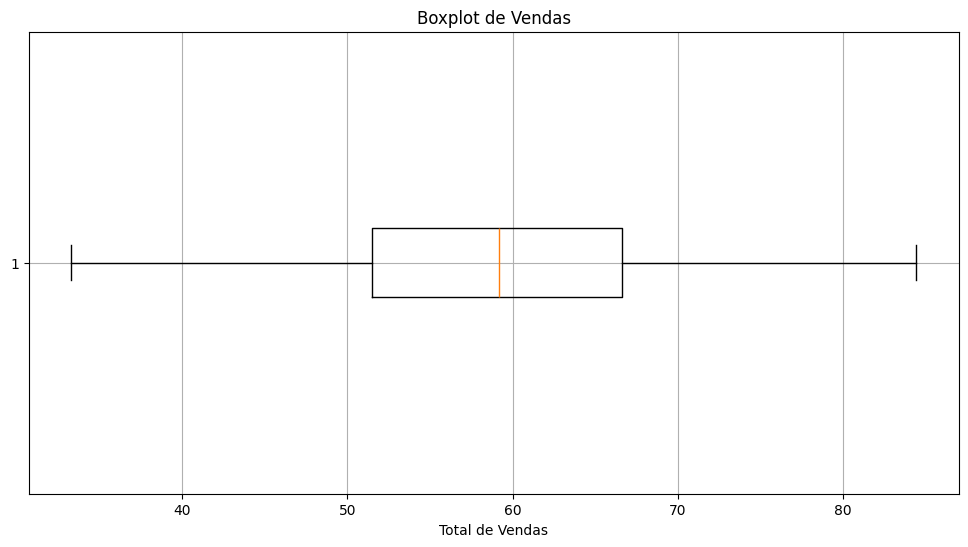

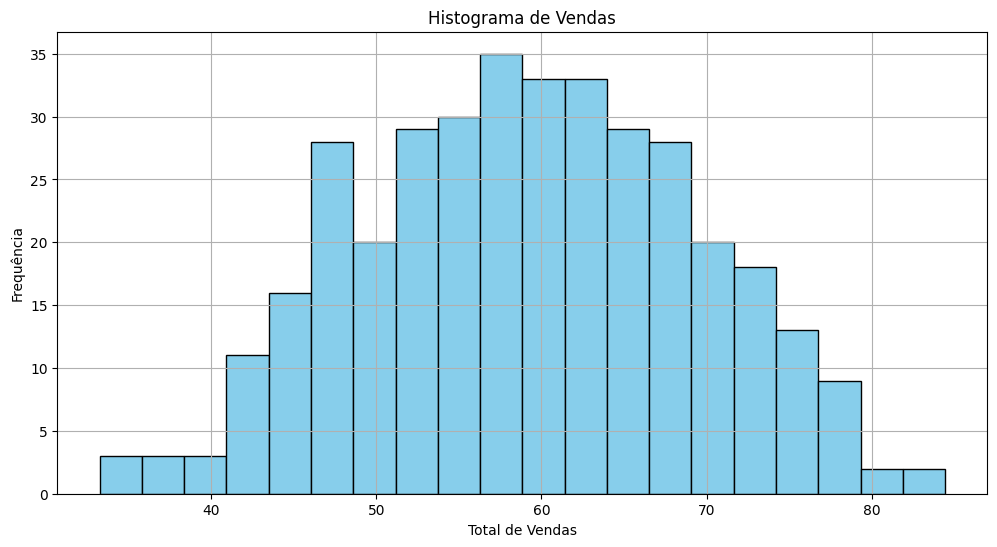

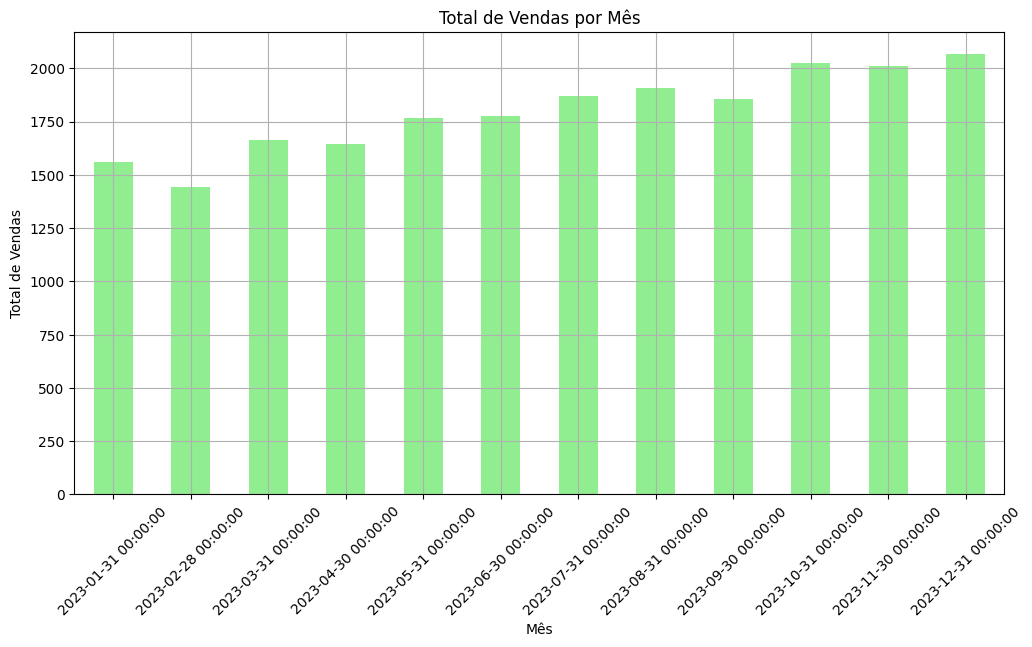

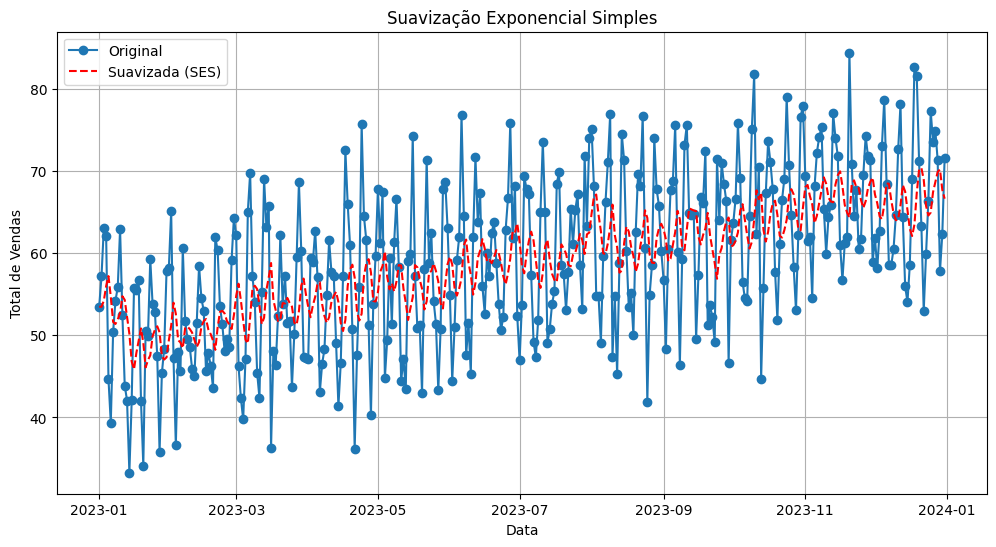

Previsões para os próximos 7 dias:
2024-01-01    67.649892
2024-01-02    67.649892
2024-01-03    67.649892
2024-01-04    67.649892
2024-01-05    67.649892
2024-01-06    67.649892
2024-01-07    67.649892
Freq: D, dtype: float64


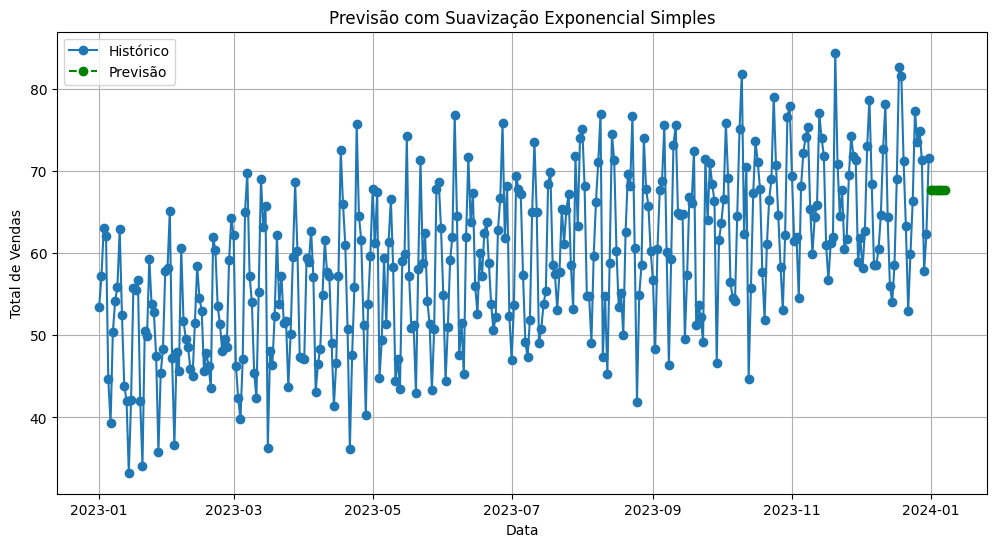

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Converte a coluna 'Data' para o tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

# Definir a frequência como diária (D)
serie_temporal = serie_temporal.asfreq('D')

# Verificar o tipo da variável 'serie_temporal'
print(type(serie_temporal))

# 1. **Gráfico de Linha - Série Temporal**
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, marker='o', linestyle='-', label='Total de Vendas')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Série Temporal de Vendas")
plt.legend()
plt.grid()
plt.show()

# 2. **Boxplot - Visualização de distribuição e possíveis outliers**
plt.figure(figsize=(12, 6))
plt.boxplot(serie_temporal, vert=False)
plt.xlabel("Total de Vendas")
plt.title("Boxplot de Vendas")
plt.grid(True)
plt.show()

# 3. **Histograma - Distributação dos valores**
plt.figure(figsize=(12, 6))
plt.hist(serie_temporal, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Total de Vendas")
plt.ylabel("Frequência")
plt.title("Histograma de Vendas")
plt.grid(True)
plt.show()

# 4. **Gráfico de Barra - Vendas por período (por exemplo, mês)**
# Para esse exemplo, vamos agrupar os dados por mês
serie_temporal_mensal = serie_temporal.resample('M').sum()

plt.figure(figsize=(12, 6))
serie_temporal_mensal.plot(kind='bar', color='lightgreen')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.title("Total de Vendas por Mês")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. **Suavização Exponencial Simples (SES)**
modelo = SimpleExpSmoothing(serie_temporal)

# Treinamento do modelo com um fator de suavização
modelo_ajustado = modelo.fit(smoothing_level=0.2, optimized=False)

# Gerar previsões para o histórico
serie_suavizada = modelo_ajustado.fittedvalues

# 6. **Gráfico de Linha - Série Original vs. Suavizada**
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Original", linestyle='-', marker='o')
plt.plot(serie_suavizada, label="Suavizada (SES)", linestyle='--', color='red')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Suavização Exponencial Simples")
plt.legend()
plt.grid(True)
plt.show()

# 7. **Previsão para os Próximos 7 Dias**
previsao = modelo_ajustado.forecast(steps=7)

# Exibir previsões
print("Previsões para os próximos 7 dias:")
print(previsao)

# 8. **Gráfico de Linha - Histórico vs. Previsões**
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", linestyle='-', marker='o')
plt.plot(previsao, label="Previsão", linestyle='--', color='green', marker='o')
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.title("Previsão com Suavização Exponencial Simples")
plt.legend()
plt.grid(True)
plt.show()
